# Variable Input Simulations

We generate multiple soap `.orb` files which perturb the acceleration parameters of a fixed set of satellites. We then compare the resultant barcodes to the original file.

## Generate Base Orb File

In [1]:
from os_utilities import *
from orb_builder import *

orb_filenames = []

folder_name = "sim-2022-09-09"
prefix = "moongnd"
i = 0
k = 10

folder = "./outputs/" + folder_name
make_folder(folder)

starlink = build_satellites_csv("starlink")
moon_sats = get_moon_platforms()
ground = [
    create_ground_object_dictionary("Ground-Albany", 42.685012663456163, -73.82479012295363, 0),
    create_ground_object_dictionary("Ground-Sydney", -33.868888888888889, 151.20939697339508, 0)
]

norad = build_satellites_from_tle("./sources/tdrss.tle")

name = prefix + "_base"

subset = sample_sats(starlink, k)

# track which satellites were chosen for subsequent simulations
subset_names = []
for satellite in subset:
    subset_names.append(satellite["object_name"])
    
satellites = subset + moon_sats + ground

orb_filenames.append(name + ".orb")

save_to_outputs_file(
    generate_orb(satellites, name),
    folder_name + "/" + name, "orb")

2022-04-30 01:43:00
2022-05-01 01:43:00


0

## Generate Variable Orb Files

In [2]:
# epsilons = []
# for i in range(10):
    

parameters = {
    "inclination" : [0.2, 0.4, 0.6, 0.8, 1.0], 
    "mean_motion" : [0.2, 0.4, 0.6, 0.8, 1.0], 
    "eccentricity" : [0.001, 0.002, 0.01, 0.02]
}


for parameter, epsilons in parameters.items():   
    print(parameter)
    for epsilon in epsilons:
        name = prefix + "_" + parameter + "_" + str(epsilon)

        
        # regenerate satellites to base
        starlink = build_satellites_csv("starlink")
        moon_sats = get_moon_platforms()
        ground = [
            create_ground_object_dictionary("Ground-Albany", 42.685012663456163, -73.82479012295363, 0),
            create_ground_object_dictionary("Ground-Sydney", -33.868888888888889, 151.20939697339508, 0)
        ]
    
        subset = []
        for satellite in starlink:
            if satellite["object_name"] in subset_names:
                subset.append(satellite)

        satellites = subset + moon_sats + ground
        
        for satellite in satellites:
            if parameter in satellite:
#                 print("satellite[{}] = {} + {}".format(parameter, satellite[parameter], epsilon))
                satellite[parameter] = satellite[parameter] + epsilon
                
        orb_filenames.append(name + ".orb")
        save_to_outputs_file(
            generate_orb(satellites, name),
            folder_name + "/" + name, "orb")
        
        
#         print("\t" + str(epsilon))


# for satellite in satellites:
#     print(satellite)

inclination
mean_motion
eccentricity


## Manually Run Simulations

Run `./run.sh` in simulation folder to generate contact analysis output files.

In [3]:
import subprocess

command = "wine"
soap_path = "/home/zeno/.wine/drive_c/SOAP/bin64/soap.exe"

for filename in orb_filenames:
#     print(filename)

    orb_path = "" + folder + "/" + filename + ""
    process = subprocess.Popen([command, soap_path, orb_path])
    # process = subprocess.Popen([command, soap_path, orb_path], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
    process.wait()


0080:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0080:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0080:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0080:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0
0118:fixme:tasklist:wmain stub: L"tasklist" L"/nh" L"/fo" L"csv" L"/fi" L"Imagename eq soap64.exe" L"/fi" L"Status eq Running"
00d4:fixme:wintab32:x11drv_tablet_info Return proper size
00d4:fixme:win:NtUserFlashWindowEx 0x11f1a0 - semi-stub
0094:fixme:imm:ImeSetActiveContext (0000000000010026, 0): stub
0094:fixme:imm:ImmReleaseContext (0000000000010020, 0000000000010026): stub
00d4:fixme:imm:ImeSetActiveContext (0000000000010050, 1): stub
00d4:fixme:imm:ImmReleaseContext (000000000001006E, 0000000000010050): stub
00d4:fixme:win:RegisterTouchWindow (000000000001006E 00000000): stub
00d4:fixme:wgl:X11DRV_wglGetPixelFormatAttribivARB unsupported 20

0230:fixme:tasklist:wmain stub: L"tasklist" L"/nh" L"/fo" L"csv" L"/fi" L"Imagename eq soap64.exe" L"/fi" L"Status eq Running"
0220:fixme:wintab32:x11drv_tablet_info Return proper size
0220:fixme:win:NtUserFlashWindowEx 0x11f1a0 - semi-stub
0220:fixme:imm:ImeSetActiveContext (00000000000E007E, 1): stub
0220:fixme:imm:ImmReleaseContext (00000000000C005A, 00000000000E007E): stub
0220:fixme:win:RegisterTouchWindow (00000000000C005A 00000000): stub
0220:fixme:wgl:X11DRV_wglGetPixelFormatAttribivARB unsupported 2008 WGL Attribute
0220:fixme:msg:pack_message msg 80 (WM_SETICON) not supported yet
0220:fixme:msg:pack_message msg 80 (WM_SETICON) not supported yet
0220:fixme:msvcrt:__clean_type_info_names_internal (00000000640F8470) stub
0220:fixme:msvcrt:__clean_type_info_names_internal (00000000630D2810) stub
0220:fixme:msvcrt:__clean_type_info_names_internal (000000006590D5E0) stub
0220:fixme:msvcrt:__clean_type_info_names_internal (0000000061063BA0) stub
0220:fixme:msvcrt:__clean_type_info_n

0338:fixme:win:NtUserFlashWindowEx 0x11f1a0 - semi-stub
0338:fixme:imm:ImeSetActiveContext (0000000000150076, 1): stub
0338:fixme:imm:ImmReleaseContext (000000000014005E, 0000000000150076): stub
0338:fixme:win:RegisterTouchWindow (000000000014005E 00000000): stub
0338:fixme:wgl:X11DRV_wglGetPixelFormatAttribivARB unsupported 2008 WGL Attribute
0338:fixme:msg:pack_message msg 80 (WM_SETICON) not supported yet
0338:fixme:msg:pack_message msg 80 (WM_SETICON) not supported yet
0338:fixme:msvcrt:__clean_type_info_names_internal (00000000640F8470) stub
0338:fixme:msvcrt:__clean_type_info_names_internal (00000000630D2810) stub
0338:fixme:msvcrt:__clean_type_info_names_internal (000000006590D5E0) stub
0338:fixme:msvcrt:__clean_type_info_names_internal (0000000061063BA0) stub
0338:fixme:msvcrt:__clean_type_info_names_internal (00000000672BF920) stub
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: Interlace handling should be turned on when using png_read_image


## Calculate Barcode Distances Relative Base

	2-Wasserstein distance between 0-dimensional persistence diagrams: 1286.26318359375
	Bottleneck distance between 0-dimensional persistence diagrams: 954.8192138671875
	2-Wasserstein distance between 0-dimensional persistence diagrams: 1313.045166015625
	Bottleneck distance between 0-dimensional persistence diagrams: 949.84521484375
	2-Wasserstein distance between 0-dimensional persistence diagrams: 1536.781005859375
	Bottleneck distance between 0-dimensional persistence diagrams: 950.0618896484375
	2-Wasserstein distance between 0-dimensional persistence diagrams: 2008.9013671875
	Bottleneck distance between 0-dimensional persistence diagrams: 945.08740234375
	2-Wasserstein distance between 0-dimensional persistence diagrams: 2436.281494140625
	Bottleneck distance between 0-dimensional persistence diagrams: 950.5


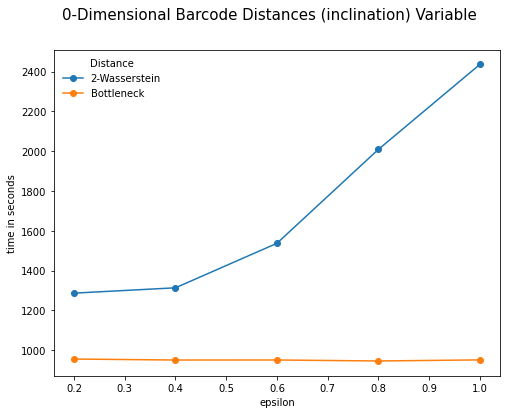

	2-Wasserstein distance between 0-dimensional persistence diagrams: 11424.2607421875
	Bottleneck distance between 0-dimensional persistence diagrams: 7278.171875
	2-Wasserstein distance between 0-dimensional persistence diagrams: 15083.7978515625
	Bottleneck distance between 0-dimensional persistence diagrams: 7150.3828125
	2-Wasserstein distance between 0-dimensional persistence diagrams: 17328.140625
	Bottleneck distance between 0-dimensional persistence diagrams: 11179.041015625
	2-Wasserstein distance between 0-dimensional persistence diagrams: 18587.568359375
	Bottleneck distance between 0-dimensional persistence diagrams: 11220.01953125
	2-Wasserstein distance between 0-dimensional persistence diagrams: inf
	Bottleneck distance between 0-dimensional persistence diagrams: inf


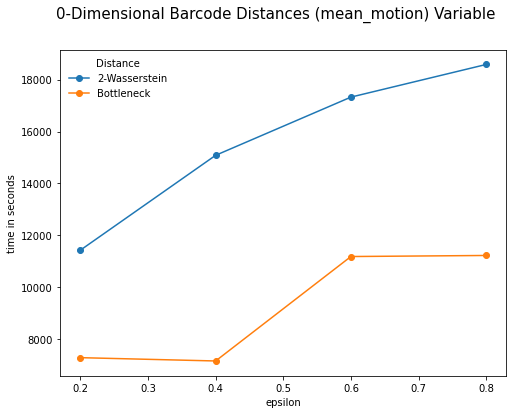

	2-Wasserstein distance between 0-dimensional persistence diagrams: 53.48419189453125
	Bottleneck distance between 0-dimensional persistence diagrams: 47.01681900024414
	2-Wasserstein distance between 0-dimensional persistence diagrams: 529.2702026367188
	Bottleneck distance between 0-dimensional persistence diagrams: 399.4808349609375
	2-Wasserstein distance between 0-dimensional persistence diagrams: 1771.5494384765625
	Bottleneck distance between 0-dimensional persistence diagrams: 954.626708984375
	2-Wasserstein distance between 0-dimensional persistence diagrams: 3441.03564453125
	Bottleneck distance between 0-dimensional persistence diagrams: 2299.84375


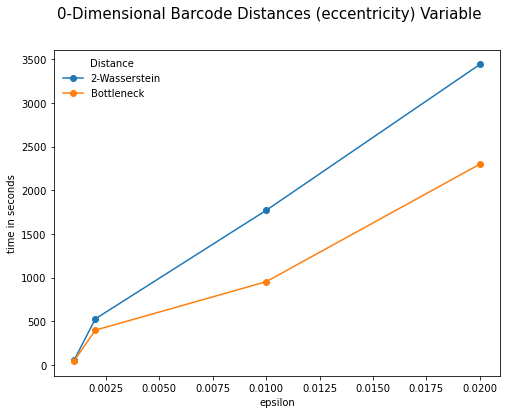

In [5]:
from zz_persistence import *

diagrams = {}

filepaths = get_csv_files(folder)
for filepath in filepaths:
    contact_plan = ca.contact_analysis_parser(filepath)
    graph = ca.construct_graph(contact_plan)
    weighted_simplex = ca.construct_weighted_simplex(graph)
    zz, dgms, cells = calculate_zz_persistence(weighted_simplex)
    
    diagrams[filepath.split("/")[-1]] = dgms
    
postfix = " Contact Analysis.csv"
diagram_base = diagrams[prefix + "_base" + postfix]


# # Creating a numpy array
# x = []
# y = []
# zw = []
# zb = []

# print(diagrams.keys())
dim = 0
for parameter, epsilons in parameters.items():
    
    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.set_xlabel('epsilon')
    ax.set_ylabel('time in seconds')
    title = "{}-Dimensional Barcode Distances ({}) Variable".format(
        dim,
        parameter
    )
    fig.suptitle(title, fontsize=15)

    w_distances = []
    b_distances = []
    for epsilon in epsilons:
        # print("{}:{}".format(parameter, epsilon))
        diagram = diagrams[prefix + "_" + parameter + "_" + str(epsilon) + postfix]
        
        wdist = d.wasserstein_distance(diagram_base[dim], diagram[dim], q=2)
        w_distances.append(wdist)
        print("\t2-Wasserstein distance between {}-dimensional persistence diagrams: {}".format(dim, wdist))
    
        bdist = d.bottleneck_distance(diagram_base[dim], diagram[dim])
        b_distances.append(bdist)
        print("\tBottleneck distance between {}-dimensional persistence diagrams: {}".format(dim, bdist))
    ax.plot(epsilons, w_distances, "o-", label="2-Wasserstein")
    ax.plot(epsilons, b_distances, "o-", label="Bottleneck")
    plt.legend(title="Distance", frameon=False)
    plt.show()